In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import MinMaxScaler

#### First we have performed EDA (Exploratory Data Analysis) on our dataset before moving on to scaling and applying algorithms (KMeans).

In [2]:
data= pd.read_csv('E:\Data science\datasets\iris\Iris.csv')

In [3]:
df= data.copy()
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.shape

(150, 6)

<Figure size 576x432 with 0 Axes>

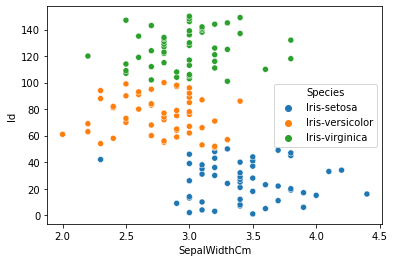

<Figure size 576x432 with 0 Axes>

In [5]:
sns.scatterplot(data=df,hue='Species', x='SepalWidthCm' , y='Id')
plt.figure(figsize=(8, 6))

# K Means

In [6]:
#Creating new dataframe with no labels. 
X = df.drop(['Id','Species'],axis = 1) 
column_names = X.columns
column_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [7]:
# Scaling our dataset
scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

In [8]:
# Finding our how many clusters to make

k_values = []
intertia_scores = []
for k in range(2,15):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(scaled_X)
    intertia_scores.append(model.inertia_)
    k_values.append(k)

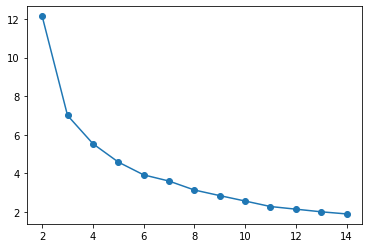

In [9]:
# visualizing the affect of different k values on the inertia
plt.plot(k_values, intertia_scores)
plt.scatter(k_values, intertia_scores)
plt.show()

##### We can see that after k=3, the inertia decreases more slowly. Indicating that k=3 is the optimal no. of clusters

Now initializing and fitting the KMeans model

In [10]:
#initializing the model
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300,random_state = 50)
'''
    n_clusters: specifies the no. of groups we want our samples to be made into
    n_init: specifies the no. of times the algorithm should be run on different positions of centroids
    max_iter: specifies the no. of time algorithm should run after updating the centroid position 

'''

#fitting the model to the scaled dataset
kmeans.fit(scaled_X)

KMeans(n_clusters=3, random_state=50)

In [11]:
# Displaying the entire dataset with the newly made clusters
X_clusterized = pd.DataFrame(data=scaled_X, columns=column_names)
labels = kmeans.labels_
X_clusterized['kmeans_clusters'] = labels
X_clusterized

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,kmeans_clusters
0,0.222222,0.625000,0.067797,0.041667,1
1,0.166667,0.416667,0.067797,0.041667,1
2,0.111111,0.500000,0.050847,0.041667,1
3,0.083333,0.458333,0.084746,0.041667,1
4,0.194444,0.666667,0.067797,0.041667,1
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,0
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,0
148,0.527778,0.583333,0.745763,0.916667,0


#### Now performing Dimension Reduction with PCA (Principal Component Analysis)

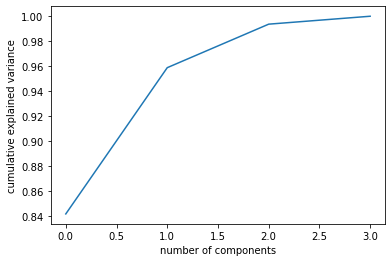

In [12]:
# Figuring out how many components should our dataset be reduced to
from sklearn.decomposition import PCA

model = PCA().fit(scaled_X)

plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.ylabel('cumulative explained variance')
plt.xlabel('number of components')
plt.show()

We observe that more than 95% of the data can be explained by 2 components. Hence, 2 is the optimal no. of components.

##### Now performing the PCA on the data

In [13]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_X)
reduced_df = pd.DataFrame(reduced_data, columns=['first_component', 'second_component'])
reduced_df

,first_component,second_component
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558
...,...,...
145,0.551755,0.058990
146,0.406278,-0.172227
147,0.447293,0.036996
148,0.489218,0.149121


Now applying KMeans algorithm to the reduced Dataframe

In [14]:
new_kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300, random_state = 50)
new_kmeans.fit(reduced_df)

final_labels = new_kmeans.labels_
reduced_df['new_clusters'] = final_labels
reduced_df

,first_component,second_component,new_clusters
0,-0.630361,0.111556,0
1,-0.623546,-0.100313,0
2,-0.669793,-0.047220,0
3,-0.654633,-0.098791,0
4,-0.648263,0.137558,0
...,...,...,...
145,0.551755,0.058990,2
146,0.406278,-0.172227,1
147,0.447293,0.036996,2
148,0.489218,0.149121,2


#### Finally comparing the results of the clusters made with and without PCA

Text(0.5, 1.0, 'plot of components after PCA')

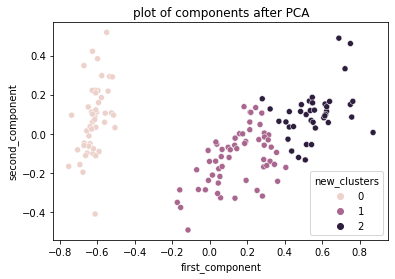

In [15]:
after_pca_plot = sns.scatterplot(data=reduced_df, hue='new_clusters', x="first_component", y='second_component')
after_pca_plot.set_title("plot of components after PCA")

Text(0.5, 1.0, 'plot of components before PCA')

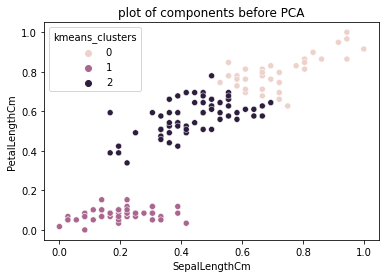

In [16]:
plot_before_pca = sns.scatterplot(data=X_clusterized, hue='kmeans_clusters', x="SepalLengthCm", y='PetalLengthCm')
plot_before_pca.set_title("plot of components before PCA")

In [23]:

result_before_pca = X_clusterized['kmeans_clusters']  

result_after_pca = reduced_df['new_clusters']

# calculated the Adjusted Rand Index by comparing both labels 
ari = adjusted_rand_score(result_before_pca, result_after_pca)
ari 

1.0